# Part 1 — GMM from Scratch (NumPy only)
- Full EM algorithm
- Covariance types: full, tied, diag, spherical
- Log-likelihood tracking and stability (reg_covar)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
os.chdir("..")
sys.path.append(os.getcwd())

from src.utils.random import set_seed
from src.utils.preprocessing import StandardScaler


In [8]:
import os
os.chdir('..')
import sys
sys.path.append('.')
from src.clustering.gmm import GMM


In [9]:
# Data loading (Breast Cancer Wisconsin Diagnostic)
# We avoid sklearn for loading; we use pandas to read the UCI dataset.
# If you're offline, download the CSV once and set LOCAL_CSV path.

UCI_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
LOCAL_CSV = None  # e.g. "data/wdbc.data"

cols = ["id", "diagnosis"] + [f"f{i}" for i in range(30)]
if LOCAL_CSV is None:
    df = pd.read_csv(UCI_URL, header=None, names=cols)
else:
    df = pd.read_csv(LOCAL_CSV, header=None, names=cols)

y = (df["diagnosis"].values == "M").astype(int)  # Malignant=1, Benign=0 (used ONLY for evaluation)
X = df.drop(columns=["id","diagnosis"]).values.astype(float)

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

print("X:", X.shape, "Xs:", Xs.shape, "Malignant%:", y.mean())


X: (569, 30) Xs: (569, 30) Malignant%: 0.37258347978910367


In [10]:
gmm = GMM(n_components=2, covariance_type="full", seed=42, reg_covar=1e-6).fit(Xs)
labels = gmm.predict(Xs)
print("Converged:", gmm.converged_, "iters:", gmm.n_iter_)
print("Final log-likelihood:", gmm.log_likelihood(Xs))
print("BIC:", gmm.bic(Xs), "AIC:", gmm.aic(Xs))


Converged: True iters: 9
Final log-likelihood: -2826.5770518930776
BIC: 11939.93961400535 AIC: 7635.154103786155


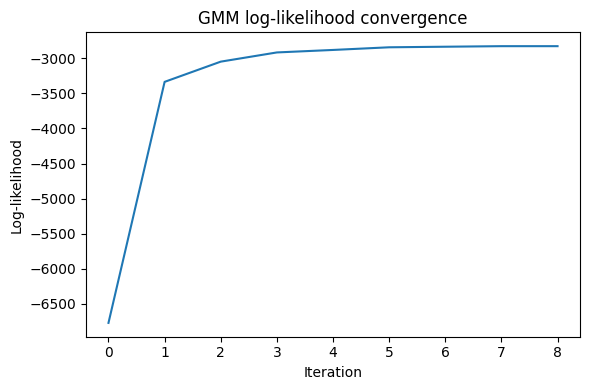

In [11]:
plt.figure(figsize=(6,4))
plt.plot(gmm.log_likelihood_history_)
plt.title("GMM log-likelihood convergence")
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.tight_layout()
plt.show()
